In [47]:
# Kaggle API'sini Python'da kullanabilmek için gerekli olan 'kaggle' kütüphanesini yükledik.
!pip install kaggle

In [ ]:
# Google Colab ortamına yerel bilgisayardan dosya yüklemek için kullandık.
from google.colab import files
files.upload()

In [49]:
# Kaggle API anahtarını ('kaggle.json') doğru dizine kopyaladık ve güvenlik için erişim izinlerini ayarladık.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [50]:
# Bu komut 'omkargurav/face-mask-dataset' veri setini '.zip' formatında indirir.
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
# İndirilen sıkıştırılmış (.zip) dosyanın içindeki verileri dışarı aktarır.
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [52]:
# Bulunulan dizindeki dosya ve klasörleri listeler.
!ls

 data   face-mask-dataset.zip  'kaggle (1).json'   kaggle.json	 sample_data


In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [54]:
# 'with_mask' klasöründeki tüm dosya adlarını bir liste olarak alır.
with_mask_files = os.listdir('/content/data/with_mask')

# Listenin ilk 5 dosya adını yazdırır.
print(with_mask_files[0:5])

# Listenin son 5 dosya adını yazdırır.
print(with_mask_files[-5:])

['with_mask_3434.jpg', 'with_mask_2950.jpg', 'with_mask_623.jpg', 'with_mask_1265.jpg', 'with_mask_1450.jpg']
['with_mask_761.jpg', 'with_mask_3619.jpg', 'with_mask_1664.jpg', 'with_mask_2375.jpg', 'with_mask_3629.jpg']


In [55]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1396.jpg', 'without_mask_2432.jpg', 'without_mask_295.jpg', 'without_mask_1901.jpg', 'without_mask_480.jpg']
['without_mask_2031.jpg', 'without_mask_3675.jpg', 'without_mask_371.jpg', 'without_mask_1705.jpg', 'without_mask_3089.jpg']


In [56]:
# 'with_mask_files' listesindeki toplam görüntü sayısını yazdırır.
print('Number of with mask images:', len(with_mask_files))

# 'without_mask_files' listesindeki toplam görüntü sayısını yazdırır.
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [57]:
# 'with_mask' görüntüleri için 1'lerden oluşan bir liste oluşturur (3725 adet).
# Modelde '1' etiketi "maskeli" anlamına gelecek.

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [58]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [59]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [60]:
# Maskeli ve maskesiz etiket listelerini tek bir listede birleştirir.
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


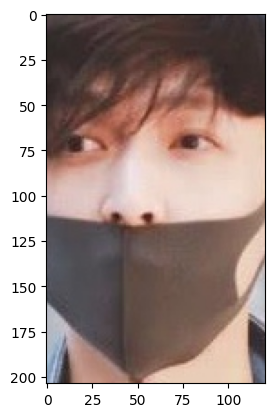

In [61]:
# 'matplotlib.image' (mpimg) kütüphanesi ile belirtilen yoldaki görüntüyü okur ve bir diziye (array) dönüştürür.
img = mpimg.imread('/content/data/with_mask/with_mask_1001.jpg')
imgplot = plt.imshow(img)
plt.show()

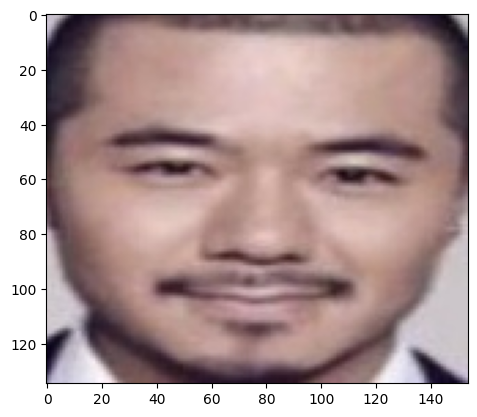

In [62]:

img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy arrays

In [63]:
# Maskeli görüntülerin bulunduğu klasörün yolu bir değişkene atadık.
with_mask_path = '/content/data/with_mask/'

# Verilerin NumPy dizisi olarak saklanacağı boş bir liste
data = []

for img_file in with_mask_files:

# Görüntüyü açar, 128x128'e yeniden boyutlandırır, RGB'ye çevirir ve NumPy dizisi olarak listeye ekler.
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [64]:
type(data)

list

In [65]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
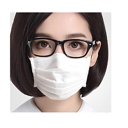

In [66]:
data[0]

In [67]:
type(data[0])

numpy.ndarray

In [68]:
data[0].shape

(128, 128, 3)

In [69]:
# Görüntüleri içeren 'data' listesini ve etiketleri içeren 'labels' listesini NumPy dizilerine çevirir.
# Makine öğrenmesi modelleri genellikle girdi olarak NumPy dizilerini kullanır.
X = np.array(data)
Y = np.array(labels)

In [70]:
type(X)

numpy.ndarray

In [71]:
type(Y)

numpy.ndarray

In [72]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [73]:
print(Y)

[1 1 1 ... 0 0 0]


### **Train Test Split**

In [74]:
# Tüm veri setini (X ve Y), modeli eğitmek ve test etmek için iki parçaya böler.
# test_size=0.2: Verinin %20'sinin test, %80'inin eğitim için ayrılacağını belirtir.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [75]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [76]:
# Görüntü verilerini ölçeklendirme işlemi.
# Piksel değerleri 0-255 arasındadır. Bu değerleri 255'e bölerek 0-1 aralığına normalize ederiz.
# Bu, sinir ağı modelinin daha hızlı ve daha kararlı öğrenmesine yardımcı olur.
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 68,  62,  74],
        [ 68,  62,  75],
        [ 69,  63,  78],
        ...,
        [ 57,  51,  65],
        [ 57,  51,  65],
        [ 57,  51,  65]],

       [[ 68,  62,  74],
        [ 69,  64,  76],
        [ 68,  64,  76],
        ...,
        [ 58,  52,  66],
        [ 58,  52,  66],
        [ 57,  51,  65]],

       [[ 69,  64,  76],
        [ 69,  65,  76],
        [ 68,  65,  76],
        ...,
        [ 59,  53,  67],
        [ 58,  52,  66],
        [ 58,  52,  66]],

       ...,

       [[134, 138, 147],
        [138, 142, 151],
        [142, 146, 155],
        ...,
        [ 97,  96, 104],
        [ 96,  95, 103],
        [ 95,  92, 101]],

       [[134, 138, 147],
        [139, 143, 152],
        [141, 146, 155],
        ...,
        [ 97,  95, 106],
        [ 95,  94, 103],
        [ 95,  93, 101]],

       [[134, 138, 146],
        [139, 143, 151],
        [141, 146, 155],
        ...,
        [ 98,  96, 107],
        [ 95,  94, 103],
        [ 94,  93, 101]]], dtype=uint8)
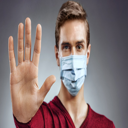

In [77]:
X_train[0]

In [78]:
X_train_scaled[0]

array([[[0.26666667, 0.24313725, 0.29019608],
        [0.26666667, 0.24313725, 0.29411765],
        [0.27058824, 0.24705882, 0.30588235],
        ...,
        [0.22352941, 0.2       , 0.25490196],
        [0.22352941, 0.2       , 0.25490196],
        [0.22352941, 0.2       , 0.25490196]],

       [[0.26666667, 0.24313725, 0.29019608],
        [0.27058824, 0.25098039, 0.29803922],
        [0.26666667, 0.25098039, 0.29803922],
        ...,
        [0.22745098, 0.20392157, 0.25882353],
        [0.22745098, 0.20392157, 0.25882353],
        [0.22352941, 0.2       , 0.25490196]],

       [[0.27058824, 0.25098039, 0.29803922],
        [0.27058824, 0.25490196, 0.29803922],
        [0.26666667, 0.25490196, 0.29803922],
        ...,
        [0.23137255, 0.20784314, 0.2627451 ],
        [0.22745098, 0.20392157, 0.25882353],
        [0.22745098, 0.20392157, 0.25882353]],

       ...,

       [[0.5254902 , 0.54117647, 0.57647059],
        [0.54117647, 0.55686275, 0.59215686],
        [0.55686275, 0

### Building a Convolutional Neural Networks (CNN)**bold text**

In [79]:
import tensorflow as tf
from tensorflow import keras

In [80]:
# Sınıf sayısını belirtir (bizim durumumuzda 2: maskeli ve maskesiz).
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [81]:
# Modelin eğitim için nasıl yapılandırılacağını belirler.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# **optimizer='adam':** Modelin ağırlıklarını nasıl güncelleyeceğini belirleyen popüler bir optimizasyon algoritması.

# **loss='sparse_categorical_crossentropy':** Modelin tahminlerinin gerçek etiketlerden ne kadar saptığını ölçen kayıp fonksiyonu. Etiketler 0, 1, 2 gibi tamsayılar olduğunda kullanılır.

# **metrics=['acc']:** Eğitim ve test sırasında modelin başarısını ölçmek için 'doğruluk' (accuracy) metriğini kullanmasını söyler.

In [82]:
# validation_split=0.1: Eğitim verilerinin %10'unu her epoch sonunda modeli test etmek için ayırır.
# epochs=5: Model, tüm eğitim verisi üzerinden 5 kez geçer.
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step - acc: 0.6730 - loss: 0.6429 - val_acc: 0.8760 - val_loss: 0.2913
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 198s 820ms/step - acc: 0.8882 - loss: 0.2978 - val_acc: 0.8843 - val_loss: 0.2701
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 829ms/step - acc: 0.9090 - loss: 0.2350 - val_acc: 0.8909 - val_loss: 0.2327
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 843ms/step - acc: 0.9227 - loss: 0.1966 - val_acc: 0.9008 - val_loss: 0.2265
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 206s 865ms/step - acc: 0.9368 - loss: 0.1673 - val_acc: 0.9008 - val_loss: 0.2870


### Model **Evaluation**

In [83]:
# Modelin eğitim bittikten sonraki nihai performansını, daha önce hiç görmediği test verileriyle ölçer.
# Fonksiyon, kayıp (loss) ve doğruluk (accuracy) değerlerini döndürür.
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - acc: 0.9038 - loss: 0.2759
Test Accuracy = 0.9106552004814148


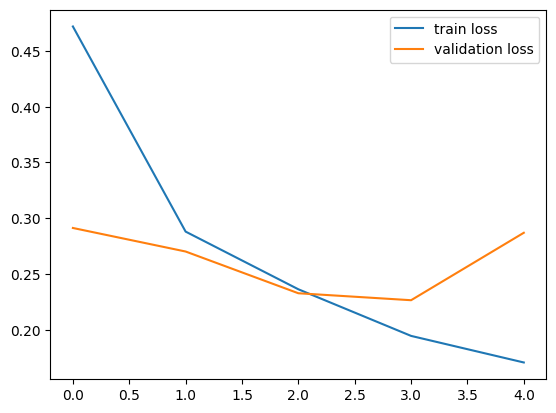

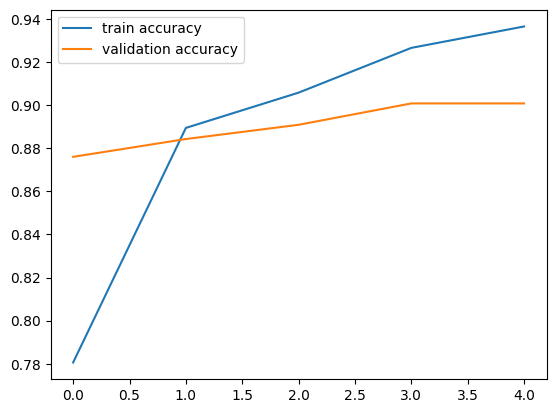

In [84]:
h = history

# Kayıp (Loss) Grafiğini Çizme
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
# Grafikteki etiketleri gösterir.
plt.legend()
plt.show()

# Doğruluk (Accuracy) Grafiğini Çizme
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/data/without_mask/without_mask_1019.jpg


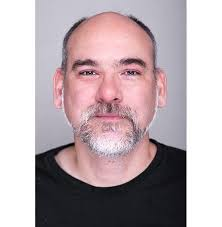

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[[0.12849437 0.93095964]]
1
The person in the image is wearing a mask


In [92]:
# Kullanıcıdan alınan resim yolunu okuyup, resmi modelin giriş formatına uygun şekilde işleyip, tahmin yaptık ve sonucu ekrana yazdırdık.
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1019.jpg


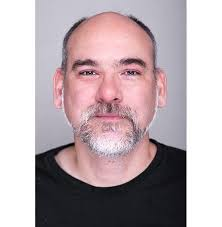

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.12849437 0.93095964]]
1
The person in the image is wearing a mask


In [91]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')